# Loading and preparing the data

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from torch.utils.data import DataLoader
from models.dataset import LCDataset

In [2]:
data = pd.read_pickle('data/clean_lc_data.pkl')
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mort_acc,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,loan_status_num
id,,,,,,,,,,,,,,,,,,,,,
1075358,3000,60 months,0.1269,67.79,B5,RENT,80000.00,Source Verified,Fully Paid,n,...,5.0,0.0,0.0,3.0,0.0,0.0,54644.0,17850.0,N,0
1071570,5375,60 months,0.1269,121.45,B5,RENT,15000.00,Verified,Charged Off,n,...,1.0,0.0,0.0,0.0,0.0,0.0,30612.0,21533.0,N,1
1069057,10000,36 months,0.1065,325.74,B2,RENT,100000.00,Source Verified,Charged Off,n,...,5.0,0.0,0.0,2.0,0.0,0.0,14358.0,17700.0,N,1
1069742,9200,36 months,0.0603,280.01,A1,RENT,77385.19,Not Verified,Fully Paid,n,...,3.0,0.0,0.0,2.0,0.0,0.0,42247.0,15142.0,N,0
1069559,6000,36 months,0.1171,198.46,B3,RENT,76000.00,Not Verified,Charged Off,n,...,3.0,0.0,0.0,0.0,0.0,0.0,43192.0,10350.0,N,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75856 entries, 1075358 to 129834559
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   75856 non-null  int64  
 1   term                        75856 non-null  object 
 2   int_rate                    75856 non-null  float64
 3   installment                 75856 non-null  float64
 4   sub_grade                   75856 non-null  object 
 5   home_ownership              75856 non-null  object 
 6   annual_inc                  75856 non-null  float64
 7   verification_status         75856 non-null  object 
 8   loan_status                 75856 non-null  object 
 9   pymnt_plan                  75856 non-null  object 
 10  purpose                     75856 non-null  object 
 11  zip_code                    75856 non-null  object 
 12  addr_state                  75856 non-null  object 
 13  dti                  

In [4]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,...,acc_now_delinq,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mort_acc,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,loan_status_num
count,75856.000000,75856.000000,75856.000000,7.585600e+04,75856.000000,75856.000000,75856.000000,75856.000000,75856.000000,75856.000000,...,75856.000000,75856.000000,75856.000000,75856.000000,75856.000000,75856.000000,75856.000000,7.585600e+04,75856.000000,75856.000000
mean,14076.631381,0.137041,429.721991,7.380120e+04,17.659481,0.254139,700.742130,0.698850,10.991787,0.135981,...,0.002531,4.248352,0.006605,8.525113,1.592122,0.106808,0.022754,4.595725e+04,21556.653910,0.194078
std,8743.619030,0.049015,261.464301,6.574256e+04,14.968522,0.766175,33.455595,0.963691,5.127483,0.415289,...,0.055484,2.883259,0.096589,484.235007,1.919198,0.317998,0.227927,4.396178e+04,20577.243366,0.395492
min,1000.000000,0.053100,7.610000,1.150000e+02,0.000000,0.000000,660.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7400.000000,0.101600,240.040000,4.500000e+04,11.010000,0.000000,675.000000,0.000000,7.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.990300e+04,8300.000000,0.000000
50%,12000.000000,0.131100,370.220000,6.240000e+04,16.730000,0.000000,695.000000,0.000000,10.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.474300e+04,15500.000000,0.000000
75%,20000.000000,0.162900,563.820000,8.900000e+04,22.940000,0.000000,720.000000,1.000000,14.000000,0.000000,...,0.000000,6.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.715925e+04,27941.750000,0.000000
max,40000.000000,0.309900,1719.830000,7.200000e+06,999.000000,26.000000,845.000000,8.000000,55.000000,9.000000,...,5.000000,46.000000,8.000000,65000.000000,31.000000,5.000000,9.000000,1.276247e+06,367300.000000,1.000000


In [207]:
data2 = pd.read_pickle('data/clean_lc_data.pkl')
data2.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'acc_open_past_24mths', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mort_acc', 'pub_rec_bankruptcies', 'tax_liens',
       'total_bal_ex_mort', 'total_bc_limit', 'hardship_flag',
       'loan_status_num'],
      dtype='object')

In [5]:
data.drop('loan_status', axis=1, inplace=True)

For the machine learning algorithms to be able to work on the data, the categorical columns have to be dealt with.

In [6]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'revol_util', 'initial_list_status', 'application_type', 'hardship_flag']


In [7]:
data['term']=data.term.map({' 36 months': 36, ' 60 months': 60})

In [8]:
data['revol_util']=data['revol_util'].str[:-1].astype(float)/100

In [9]:
data.corr()['loan_status_num'].drop('loan_status_num').sort_values()

C:\Users\Andras\AppData\Local\Temp\ipykernel_15140\838872069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['loan_status_num'].drop('loan_status_num').sort_values()


last_fico_range_low          -0.517265
total_rec_prncp              -0.407134
last_pymnt_amnt              -0.327410
total_pymnt                  -0.277484
fico_range_low               -0.113195
mort_acc                     -0.069442
total_bc_limit               -0.047498
annual_inc                   -0.037358
total_acc                    -0.026645
revol_bal                    -0.012472
acc_now_delinq               -0.001960
delinq_amnt                  -0.000982
total_bal_ex_mort             0.000208
chargeoff_within_12_mths      0.007512
tax_liens                     0.016675
collections_12_mths_ex_med    0.019469
open_acc                      0.019730
delinq_2yrs                   0.020385
pub_rec_bankruptcies          0.030040
pub_rec                       0.034440
total_rec_int                 0.038422
revol_util                    0.039651
inq_last_6mths                0.047440
dti                           0.050001
installment                   0.067891
loan_amnt                

In [10]:
dummies = ['sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'initial_list_status', 'application_type', 'hardship_flag']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [11]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,hardship_flag_Y
id,,,,,,,,,,,,,,,,,,,,,
1075358,3000,60,0.1269,67.79,80000.00,17.94,0.0,695,0.0,15.0,...,0,0,0,0,0,0,0,0,0,0
1071570,5375,60,0.1269,121.45,15000.00,18.08,0.0,725,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1069057,10000,36,0.1065,325.74,100000.00,7.06,0.0,720,2.0,14.0,...,0,0,0,0,0,0,0,0,0,0
1069742,9200,36,0.0603,280.01,77385.19,9.86,0.0,755,0.0,8.0,...,0,0,0,0,0,0,0,0,0,0
1069559,6000,36,0.1171,198.46,76000.00,2.40,0.0,690,1.0,7.0,...,0,0,0,0,0,0,0,0,0,0


# Preparing the data for the models

In [12]:
X = data.drop(columns=['loan_status_num','last_pymnt_amnt', 'total_rec_prncp', 'total_pymnt', 'total_rec_late_fee', 'out_prncp', 'out_prncp_inv'])
y = data['loan_status_num']
X_alt = data.drop(columns=['loan_status_num', 'total_pymnt', 'total_rec_late_fee', 'out_prncp', 'out_prncp_inv'])
X_alt_train, X_alt_temp, y_alt_train, y_alt_temp = train_test_split(X_alt, y, test_size=0.3, random_state=42)
X_train_extra, X_test_extra, y_train_extra, y_test_extra = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
#X = torch.tensor(X.values, dtype=torch.float32)
#y = torch.tensor(y.values, dtype=torch.float32).reshape(len(y),1)

In [13]:
# Split data into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp into validation (10%) and temp2 (20%)
X_validation, X_temp2, y_validation, y_temp2 = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Split temp2 into calibration (10%) and test (10%)
X_calibration, X_test, y_calibration, y_test = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)
X_calibration_scaled = scaler.transform(X_calibration)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_validation_tensor = torch.tensor(X_validation_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
X_calibration_tensor = torch.tensor(X_calibration_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(len(y_train),1)
y_validation_tensor = torch.tensor(y_validation.values, dtype=torch.float32).reshape(len(y_validation),1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(len(y_test),1)
y_calibration_tensor = torch.tensor(y_calibration.values, dtype=torch.float32).reshape(len(y_calibration),1)

In [14]:
X_calibration_scaled

array([[-0.9197035 , -0.56546833,  0.42785264, ..., -0.88828479,
        -0.22547968, -0.03335218],
       [ 1.81914603,  1.76844562,  2.06568556, ..., -0.88828479,
        -0.22547968, -0.03335218],
       [ 0.67795873, -0.56546833, -0.66947501, ...,  1.12576508,
        -0.22547968, -0.03335218],
       ...,
       [ 1.81914603,  1.76844562,  2.24313445, ...,  1.12576508,
        -0.22547968, -0.03335218],
       [ 0.79207746, -0.56546833,  1.08665717, ..., -0.88828479,
         4.43498951, -0.03335218],
       [-0.57734731, -0.56546833, -0.22075366, ...,  1.12576508,
        -0.22547968, -0.03335218]])

In [15]:
from sklearn.tree import DecisionTreeClassifier, export_text
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
# Fit the model using X_train and y_train
dt_model.fit(X_train_extra, y_train_extra)
# Get the rules of the decision tree
tree_rules = export_text(dt_model, feature_names=list(X_train_extra.columns))
print(tree_rules)
# Use the trained model to make predictions
predictions_extra = dt_model.predict(X_test_extra)

class_report = classification_report(y_test_extra, predictions_extra)
print("Classification Report:\n", class_report)


|--- last_fico_range_low <= 652.50
|   |--- last_fico_range_low <= 602.50
|   |   |--- initial_list_status_w <= 0.50
|   |   |   |--- class: 1
|   |   |--- initial_list_status_w >  0.50
|   |   |   |--- class: 1
|   |--- last_fico_range_low >  602.50
|   |   |--- term <= 48.00
|   |   |   |--- class: 1
|   |   |--- term >  48.00
|   |   |   |--- class: 1
|--- last_fico_range_low >  652.50
|   |--- last_fico_range_low <= 682.50
|   |   |--- term <= 48.00
|   |   |   |--- class: 0
|   |   |--- term >  48.00
|   |   |   |--- class: 0
|   |--- last_fico_range_low >  682.50
|   |   |--- last_fico_range_low <= 727.50
|   |   |   |--- class: 0
|   |   |--- last_fico_range_low >  727.50
|   |   |   |--- class: 0
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     18264
           1       0.54      0.88      0.67      4493

    accuracy                           0.83     22757
   macro avg       0.75      0.85      0.77 

As there is a significant class imbalance in the dataset, the weights have to be calculated for the classification.

In [16]:
classlabels = torch.tensor(data['loan_status_num'].values, dtype=torch.long)
class_counts = torch.bincount(classlabels)

# Compute inverse class frequencies
class_weights_original = 1.0 / class_counts.float()

# Normalize class weights
class_weights_original /= class_weights_original.sum()
class_weights = class_weights_original[y_train_tensor.long()]


Preparing evaluation functions to see the models' results.

In [17]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();


# Setting up the baseline

In [18]:
from models.model import Logistic_Regression, MLP
from torchinfo import summary

In [19]:
#calculating number of features
n_features=len(data.drop(columns=['loan_status_num']).columns)-6
n_features

1001

In [20]:
lr_model = Logistic_Regression(num_features=n_features)
summary(lr_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
Logistic_Regression                      [53099, 1]                --
├─Sequential: 1-1                        [53099, 1]                --
│    └─Linear: 2-1                       [53099, 1]                1,002
│    └─Sigmoid: 2-2                      [53099, 1]                --
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 53.21
Input size (MB): 212.61
Forward/backward pass size (MB): 0.42
Params size (MB): 0.00
Estimated Total Size (MB): 213.04

In [21]:
LEARNING_RATE = 0.01
EPOCHS = 1000

In [22]:
loss_function = nn.BCELoss(weight=class_weights)

In [23]:
optimizer = optim.Adam(lr_model.parameters(), lr=LEARNING_RATE)

In [24]:
def calculate_accuracy(preds, actuals):

    with torch.no_grad():
        rounded_preds = torch.round(preds)
        num_correct = torch.sum(rounded_preds == actuals)
        accuracy = num_correct/len(preds)

    return accuracy

In [25]:
train_losses = []
#test_losses  = []
train_accs = []
test_accs  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds = lr_model(X_train_tensor)
    train_loss  = loss_function(train_preds, y_train_tensor)

    # Predicting test data #b
    with torch.no_grad():
        test_preds = lr_model(X_validation_tensor)
        #test_loss  = loss_function(test_preds, y_test)

    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds, y_train_tensor)
    test_acc  = calculate_accuracy(test_preds, y_validation_tensor)

    # Backward propagation #d
    optimizer.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer.step()

    # Store training history #f
    train_losses.append(train_loss.item())
    #test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())

    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
              f' Train loss: {np.round(train_loss.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
              f' Train acc: {np.round(train_acc.item(),2)} \t|' \
              f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.229 	| Train acc: 0.49 	| Test acc: 0.49
Epoch: 100 	| Train loss: 0.148 	| Train acc: 0.81 	| Test acc: 0.8
Epoch: 200 	| Train loss: 0.134 	| Train acc: 0.84 	| Test acc: 0.83
Epoch: 300 	| Train loss: 0.127 	| Train acc: 0.85 	| Test acc: 0.85
Epoch: 400 	| Train loss: 0.123 	| Train acc: 0.86 	| Test acc: 0.85
Epoch: 500 	| Train loss: 0.122 	| Train acc: 0.86 	| Test acc: 0.85
Epoch: 600 	| Train loss: 0.121 	| Train acc: 0.86 	| Test acc: 0.85
Epoch: 700 	| Train loss: 0.12 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 800 	| Train loss: 0.12 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 900 	| Train loss: 0.121 	| Train acc: 0.86 	| Test acc: 0.86


In [26]:
evaluate_nn(y_train_tensor.clone().detach(), train_preds.clone().detach().round(), train=True)
evaluate_nn(y_validation_tensor.clone().detach(), test_preds.clone().detach().round(), train=False)

Train Result:
Accuracy Score: 86.06%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.962447      0.595743  0.860562      0.779095      0.891805
recall         0.860882      0.859224  0.860562      0.860053      0.860562
f1-score       0.908836      0.703627  0.860562      0.806231      0.869304
support    42870.000000  10229.000000  0.860562  53099.000000  53099.000000
_______________________________________________
Confusion Matrix: 
 [[36906  5964]
 [ 1440  8789]]

Test Result:
Accuracy Score: 85.75%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.954712     0.599513  0.857504     0.777113      0.884751
recall        0.863516     0.832995  0.857504     0.848256      0.857504
f1-score      0.906827     0.697227  0.857504     0.802027      0.865543
support    60

In [27]:
test_preds_lr = lr_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_lr.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 84.82%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.949955     0.582266  0.848242     0.766111      0.877420
recall        0.856046     0.816489  0.848242     0.836268      0.848242
f1-score      0.900559     0.679768  0.848242     0.790163      0.857003
support    6120.000000  1504.000000  0.848242  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5239  881]
 [ 276 1228]]


In [28]:
import torch
import numpy as np
from sklearn.metrics import roc_auc_score

xgb_preds = xgb_model.predict_proba(X_test_scaled)

# Convert tensors to NumPy arrays
y_prob_np = xgb_preds[:,1]
y_test_np = y_test.to_numpy()

# Calculate the AUC
auc = roc_auc_score(y_test_np, y_prob_np)

print(f"AUC: {auc:.4f}")


NameError: name 'xgb_model' is not defined

# Implementing semantic loss

In [29]:
from importlib import reload  # Python 3.4+
import models.loss
reload(models.loss)
from models.loss import semantic_loss

In [55]:
sl_model = Logistic_Regression(num_features=n_features)
summary(sl_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
Logistic_Regression                      [53099, 1]                --
├─Sequential: 1-1                        [53099, 1]                --
│    └─Linear: 2-1                       [53099, 1]                1,002
│    └─Sigmoid: 2-2                      [53099, 1]                --
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 53.21
Input size (MB): 212.61
Forward/backward pass size (MB): 0.42
Params size (MB): 0.00
Estimated Total Size (MB): 213.04

In [56]:
optimizer_sl = optim.Adam(sl_model.parameters(), lr=LEARNING_RATE)

In [57]:
last_fico = torch.tensor(X_alt_train['last_fico_range_low'].values, dtype=torch.float32).reshape(len(y_train),1)
last_pymnt = torch.tensor(X_alt_train['last_pymnt_amnt'].values, dtype=torch.float32).reshape(len(y_train),1)
total_rec = torch.tensor(X_alt_train['total_rec_prncp'].values, dtype=torch.float32).reshape(len(y_train),1)
loan_amnt = torch.tensor(X_alt_train['loan_amnt'].values, dtype=torch.float32).reshape(len(y_train),1)

rule = torch.logical_or(
    torch.logical_and(last_fico <= 632.5, last_fico <= 572.5),
    torch.logical_and(last_fico > 632.5, last_fico > 662.5)).float()
rule = torch.logical_or(
    torch.logical_and(last_fico <= 632.5, last_pymnt <= 1388.98),
    torch.logical_and(last_fico > 632.5, total_rec <= 999.98)).float()
rule = torch.where(last_fico <= 632.5, torch.tensor(1), torch.tensor(0))
rule = torch.logical_or(torch.logical_and(last_fico<=632.5, last_fico<=572.5),torch.logical_and(last_fico<=632.5, torch.logical_and(last_fico>572.5, loan_amnt>12162.5))).float()
rule = (last_fico<=652.5).float()

In [58]:
print(rule)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])


In [59]:
train_losses_sl = []
#test_losses  = []
train_accs_sl = []
test_accs_sl  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds = sl_model(X_train_tensor)
    #train_loss  = loss_function(train_preds, y_train_tensor)
    train_loss = semantic_loss(train_preds, y_train_tensor, rule, class_weights, 0.1)

    # Predicting test data #b
    with torch.no_grad():
        test_preds = sl_model(X_validation_tensor)
        #test_loss  = loss_function(test_preds, y_test)

    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds, y_train_tensor)
    test_acc  = calculate_accuracy(test_preds, y_validation_tensor)

    # Backward propagation #d
    optimizer_sl.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer_sl.step()

    # Store training history #f
    train_losses_sl.append(train_loss.item())
    #test_losses.append(test_loss.item())
    train_accs_sl.append(train_acc.item())
    test_accs_sl.append(test_acc.item())

    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
              f' Train loss: {np.round(train_loss.item(),3)} \t|' \
                  #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
              f' Train acc: {np.round(train_acc.item(),2)} \t|' \
              f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: -0.677 	| Train acc: 0.52 	| Test acc: 0.53
Epoch: 100 	| Train loss: -0.783 	| Train acc: 0.7 	| Test acc: 0.69
Epoch: 200 	| Train loss: -0.803 	| Train acc: 0.77 	| Test acc: 0.76
Epoch: 300 	| Train loss: -0.815 	| Train acc: 0.8 	| Test acc: 0.79
Epoch: 400 	| Train loss: -0.82 	| Train acc: 0.81 	| Test acc: 0.8
Epoch: 500 	| Train loss: -0.824 	| Train acc: 0.82 	| Test acc: 0.81
Epoch: 600 	| Train loss: -0.825 	| Train acc: 0.83 	| Test acc: 0.82
Epoch: 700 	| Train loss: -0.825 	| Train acc: 0.83 	| Test acc: 0.82
Epoch: 800 	| Train loss: -0.824 	| Train acc: 0.83 	| Test acc: 0.83
Epoch: 900 	| Train loss: -0.821 	| Train acc: 0.83 	| Test acc: 0.83


In [60]:
evaluate_nn(y_train_tensor.clone().detach(), train_preds.clone().detach().round(), train=True)
evaluate_nn(y_validation_tensor.clone().detach(), test_preds.clone().detach().round(), train=False)

Train Result:
Accuracy Score: 83.19%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.974185      0.537675  0.831918      0.755930      0.890096
recall         0.813366      0.909669  0.831918      0.861517      0.831918
f1-score       0.886541      0.675867  0.831918      0.781204      0.845957
support    42870.000000  10229.000000  0.831918  53099.000000  53099.000000
_______________________________________________
Confusion Matrix: 
 [[34869  8001]
 [  924  9305]]

Test Result:
Accuracy Score: 82.87%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.967666     0.539598  0.828739     0.753632      0.883352
recall        0.813930     0.889114  0.828739     0.851522      0.828739
f1-score      0.884165     0.671604  0.828739     0.777884      0.842298
support    60

In [61]:
test_preds_sl = sl_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_sl.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 82.21%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.965234     0.529553  0.822141     0.747394      0.879287
recall        0.807516     0.881649  0.822141     0.844583      0.822141
f1-score      0.879359     0.661677  0.822141     0.770518      0.836417
support    6120.000000  1504.000000  0.822141  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[4942 1178]
 [ 178 1326]]


In [62]:
rule_test = torch.tensor(X_test['last_fico_range_low'].values, dtype=torch.float32).reshape(len(y_test),1)<=652.5
rule_matched = torch.nonzero(rule_test.float(), as_tuple=True)[0].tolist()
yespred = torch.nonzero(test_preds_sl.round(), as_tuple=True)[0].tolist()
same = [value for value in yespred if value in rule_matched]
len(same)

2228

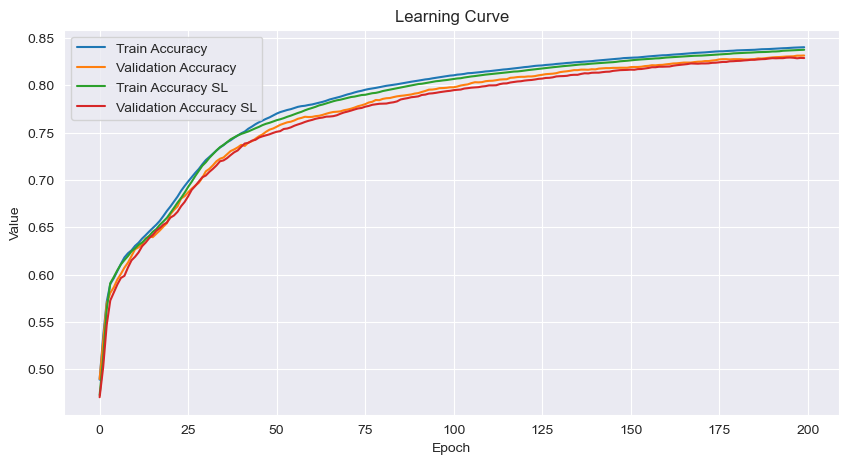

In [36]:
plt.figure(figsize=(10, 5))
#plt.plot(train_losses[:200], label='Train Loss')
plt.plot(train_accs[:200], label='Train Accuracy')
plt.plot(test_accs[:200], label='Validation Accuracy')
#plt.plot(train_losses_sl[:200], label='Train Loss SL')
plt.plot(train_accs_sl[:200], label='Train Accuracy SL')
plt.plot(test_accs_sl[:200], label='Validation Accuracy SL')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

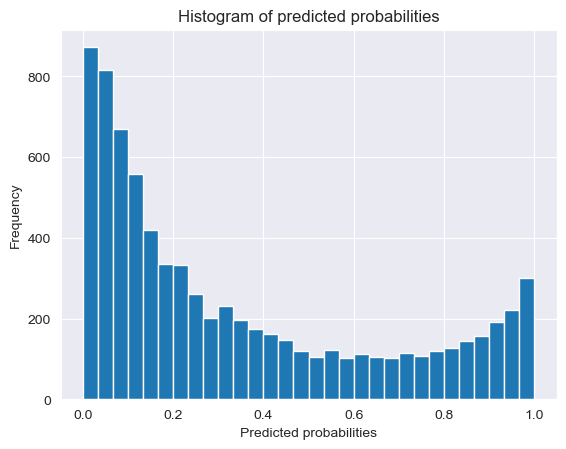

In [37]:
plt.hist(test_preds_sl.clone().detach().numpy(), bins=30, range=(0, 1))
plt.xlabel("Predicted probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of predicted probabilities")
plt.show()

# Multilayer perceptrons

In [63]:
from importlib import reload  # Python 3.4+
import models.loss
reload(models.loss)
from models.loss import semantic_loss

In [64]:
from importlib import reload  # Python 3.4+
import models.model
reload(models.model)
from models.model import MLP

In [65]:
last_fico_index = X_alt_train.columns.get_loc('last_fico_range_low')
last_pymnt_index = X_alt_train.columns.get_loc('last_pymnt_amnt')
total_rec_index = X_alt_train.columns.get_loc('total_rec_prncp')
loan_amnt_index = X_alt_train.columns.get_loc('loan_amnt')

In [66]:
dataset = LCDataset(X_train_tensor, y_train_tensor)

data_loader = DataLoader(dataset, batch_size=10000, shuffle=True)

In [67]:
mlp_model = MLP(num_features=n_features)
summary(mlp_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [53099, 1]                --
├─Sequential: 1-1                        [53099, 1]                --
│    └─Linear: 2-1                       [53099, 3]                3,006
│    └─ReLU: 2-2                         [53099, 3]                --
│    └─Linear: 2-3                       [53099, 1]                4
│    └─Sigmoid: 2-4                      [53099, 1]                --
Total params: 3,010
Trainable params: 3,010
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 159.83
Input size (MB): 212.61
Forward/backward pass size (MB): 1.70
Params size (MB): 0.01
Estimated Total Size (MB): 214.32

In [68]:
optimizer_mlp = optim.Adam(mlp_model.parameters())

In [69]:
train_losses_mlp = []
#test_losses  = []
train_accs_mlp = []
test_accs_mlp  = []

for epoch in range(200):
    # Forward propagation (predicting train data)
    for features, labels in data_loader:
        train_preds_mlp = mlp_model(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)

        train_loss_mlp  = loss_function(train_preds_mlp, labels)
    
        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlp = mlp_model(X_validation_tensor)
            #test_loss  = loss_function(test_preds, y_test)
    
        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlp, labels)
        test_acc  = calculate_accuracy(test_preds_mlp, y_validation_tensor)
    
        # Backward propagation #d
        optimizer_mlp.zero_grad()
        train_loss_mlp.backward()
    
        # Gradient descent step #e
        optimizer_mlp.step()
    
        # Store training history #f
        train_losses_mlp.append(train_loss_mlp.item())
        #test_losses.append(test_loss.item())
        train_accs_mlp.append(train_acc.item())
        test_accs_mlp.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlp.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.216 	| Train acc: 0.34 	| Test acc: 0.34
Epoch: 1 	| Train loss: 0.216 	| Train acc: 0.43 	| Test acc: 0.41
Epoch: 2 	| Train loss: 0.213 	| Train acc: 0.48 	| Test acc: 0.49
Epoch: 3 	| Train loss: 0.206 	| Train acc: 0.54 	| Test acc: 0.55
Epoch: 4 	| Train loss: 0.208 	| Train acc: 0.61 	| Test acc: 0.59
Epoch: 5 	| Train loss: 0.208 	| Train acc: 0.62 	| Test acc: 0.61
Epoch: 6 	| Train loss: 0.208 	| Train acc: 0.67 	| Test acc: 0.63
Epoch: 7 	| Train loss: 0.207 	| Train acc: 0.66 	| Test acc: 0.65
Epoch: 8 	| Train loss: 0.197 	| Train acc: 0.68 	| Test acc: 0.66
Epoch: 9 	| Train loss: 0.199 	| Train acc: 0.68 	| Test acc: 0.66
Epoch: 10 	| Train loss: 0.204 	| Train acc: 0.69 	| Test acc: 0.67
Epoch: 11 	| Train loss: 0.204 	| Train acc: 0.68 	| Test acc: 0.67
Epoch: 12 	| Train loss: 0.195 	| Train acc: 0.7 	| Test acc: 0.67
Epoch: 13 	| Train loss: 0.195 	| Train acc: 0.69 	| Test acc: 0.67
Epoch: 14 	| Train loss: 0.199 	| Train acc: 0.69 	| Test a

In [70]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlp.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 83.45%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.955298     0.552398  0.834465     0.753848      0.875941
recall        0.832836     0.841109  0.834465     0.836972      0.834465
f1-score      0.889873     0.666845  0.834465     0.778359      0.845945
support    6030.000000  1479.000000  0.834465  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[5022 1008]
 [ 235 1244]]


In [71]:
test_preds_mlp = mlp_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlp.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 82.87%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.950749     0.543345  0.828699     0.747047      0.870380
recall        0.829575     0.825133  0.828699     0.827354      0.828699
f1-score      0.886038     0.655227  0.828699     0.770633      0.840506
support    6120.000000  1504.000000  0.828699  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5077 1043]
 [ 263 1241]]


In [91]:
mlpsl_model = MLP(num_features=n_features)
summary(mlpsl_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [53099, 1]                --
├─Sequential: 1-1                        [53099, 1]                --
│    └─Linear: 2-1                       [53099, 3]                3,006
│    └─ReLU: 2-2                         [53099, 3]                --
│    └─Linear: 2-3                       [53099, 1]                4
│    └─Sigmoid: 2-4                      [53099, 1]                --
Total params: 3,010
Trainable params: 3,010
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 159.83
Input size (MB): 212.61
Forward/backward pass size (MB): 1.70
Params size (MB): 0.01
Estimated Total Size (MB): 214.32

In [92]:
optimizer_mlpsl = optim.Adam(mlpsl_model.parameters())

In [93]:
train_losses_mlpsl = []
#test_losses  = []
train_accs_mlpsl = []
test_accs_mlpsl  = []

for epoch in range(200):
    # Forward propagation (predicting train data)
    for features, labels in data_loader:
        train_preds_mlpsl = mlpsl_model(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)
        last_fico_mlpsl = features[:, last_fico_index].reshape(-1, 1)

        rule_mlpsl = (last_fico_mlpsl<=652.5).float()
        #train_loss_mlp  = loss_function(train_preds_mlp, labels)
        train_loss_mlpsl = semantic_loss(train_preds_mlpsl, labels, rule_mlpsl, class_weights_batch, 0.1)

        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlpsl = mlpsl_model(X_validation_tensor)
            #test_loss  = loss_function(test_preds, y_test)

        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlpsl, labels)
        test_acc  = calculate_accuracy(test_preds_mlpsl, y_validation_tensor)

        # Backward propagation #d
        optimizer_mlpsl.zero_grad()
        train_loss_mlpsl.backward()

        # Gradient descent step #e
        optimizer_mlpsl.step()

        # Store training history #f
        train_losses_mlpsl.append(train_loss_mlpsl.item())
        #test_losses.append(test_loss.item())
        train_accs_mlpsl.append(train_acc.item())
        test_accs_mlpsl.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlpsl.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: -0.522 	| Train acc: 0.32 	| Test acc: 0.32
Epoch: 1 	| Train loss: -0.532 	| Train acc: 0.31 	| Test acc: 0.3
Epoch: 2 	| Train loss: -0.532 	| Train acc: 0.31 	| Test acc: 0.3
Epoch: 3 	| Train loss: -0.54 	| Train acc: 0.31 	| Test acc: 0.3
Epoch: 4 	| Train loss: -0.54 	| Train acc: 0.31 	| Test acc: 0.31
Epoch: 5 	| Train loss: -0.542 	| Train acc: 0.33 	| Test acc: 0.32
Epoch: 6 	| Train loss: -0.546 	| Train acc: 0.32 	| Test acc: 0.34
Epoch: 7 	| Train loss: -0.546 	| Train acc: 0.35 	| Test acc: 0.36
Epoch: 8 	| Train loss: -0.544 	| Train acc: 0.36 	| Test acc: 0.37
Epoch: 9 	| Train loss: -0.549 	| Train acc: 0.39 	| Test acc: 0.38
Epoch: 10 	| Train loss: -0.547 	| Train acc: 0.41 	| Test acc: 0.39
Epoch: 11 	| Train loss: -0.55 	| Train acc: 0.41 	| Test acc: 0.41
Epoch: 12 	| Train loss: -0.55 	| Train acc: 0.42 	| Test acc: 0.41
Epoch: 13 	| Train loss: -0.549 	| Train acc: 0.41 	| Test acc: 0.42
Epoch: 14 	| Train loss: -0.55 	| Train acc: 0.45 	

In [94]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlpsl.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 70.17%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.977330     0.392484  0.701691     0.684907      0.862137
recall        0.643449     0.939148  0.701691     0.791299      0.701691
f1-score      0.776000     0.553607  0.701691     0.664804      0.732197
support    6030.000000  1479.000000  0.701691  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[3880 2150]
 [  90 1389]]


In [95]:
test_preds_mlpsl = mlpsl_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlpsl.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 69.37%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.974430     0.385695   0.69373     0.680062      0.858289
recall        0.635131     0.932181   0.69373     0.783656      0.693730
f1-score      0.769018     0.545631   0.69373     0.657325      0.724950
support    6120.000000  1504.000000   0.69373  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[3887 2233]
 [ 102 1402]]


In [96]:
rule_test = torch.tensor(X_test['last_fico_range_low'].values, dtype=torch.float32).reshape(len(y_test),1)<=652.5
rule_matched = torch.nonzero(rule_test.float(), as_tuple=True)[0].tolist()
yespred = torch.nonzero(test_preds_mlpsl.round(), as_tuple=True)[0].tolist()
same = [value for value in yespred if value in rule_matched]
len(same)

2378

# Tree-based predictions

In [126]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
# Fit the model using X_train and y_train
dt_model.fit(X_train_scaled, y_train)

predictions_dt = dt_model.predict(X_validation_scaled)

class_report = classification_report(y_validation, predictions_dt)
evaluate_nn(y_validation_tensor.clone().detach(), predictions_dt.round(), train=False)

Test Result:
Accuracy Score: 84.37%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.908892     0.597072  0.843654     0.752982      0.847475
recall        0.895025     0.634212  0.843654     0.764619      0.843654
f1-score      0.901905     0.615082  0.843654     0.758494      0.845411
support    6030.000000  1479.000000  0.843654  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[5397  633]
 [ 541  938]]


In [127]:
test_preds_dt = dt_model.predict(X_test_scaled)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_dt.round(), train=False)

Test Result:
Accuracy Score: 84.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.907779     0.594357  0.842209     0.751068      0.845950
recall        0.894281     0.630319  0.842209     0.762300      0.842209
f1-score      0.900980     0.611810  0.842209     0.756395      0.843935
support    6120.000000  1504.000000  0.842209  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5473  647]
 [ 556  948]]


In [128]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))

# Fit the model using X_train_scaled and y_train
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_xgb = xgb_model.predict(X_validation_scaled)

# Evaluate the performance of the model
class_report_xgb = classification_report(y_validation, predictions_xgb)
print("XGBoost Classification Report:\n", class_report_xgb)
evaluate_nn(y_validation_tensor.clone().detach(), predictions_xgb.round(), train=False)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      6030
           1       0.63      0.85      0.72      1479

    accuracy                           0.87      7509
   macro avg       0.79      0.86      0.82      7509
weighted avg       0.89      0.87      0.88      7509

Test Result:
Accuracy Score: 87.04%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.959978     0.625746  0.870422     0.792862      0.894146
recall        0.875124     0.851251  0.870422     0.863188      0.870422
f1-score      0.915589     0.721283  0.870422     0.818436      0.877318
support    6030.000000  1479.000000  0.870422  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[5277  753]
 [ 220 1259]]


In [129]:
test_preds_xgb = xgb_model.predict(X_test_scaled)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_xgb.round(), train=False)

Test Result:
Accuracy Score: 86.59%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.959114     0.616313   0.86595     0.787713      0.891489
recall        0.870098     0.849069   0.86595     0.859584      0.865950
f1-score      0.912440     0.714206   0.86595     0.813323      0.873334
support    6120.000000  1504.000000   0.86595  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5325  795]
 [ 227 1277]]


# Comparing the models on limited data

In [101]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc',
       ...
       'addr_state_UT', 'addr_state_VA', 'addr_state_VT', 'addr_state_WA',
       'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'initial_list_status_w', 'application_type_Joint App',
       'hardship_flag_Y'],
      dtype='object', length=1001)

In [102]:
X_train_alt = X_train[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'last_fico_range_low']]
X_calib_alt = X_calibration[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'last_fico_range_low']]
X_train_lim, X_remain, y_train_lim, y_remain = train_test_split(X_train_alt, y_train, test_size=0.995, random_state=42)
X_train_lim_scaled = scaler.fit_transform(X_train_lim)
X_validation_alt = X_validation[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'last_fico_range_low']]
X_validation_lim_scaled = scaler.transform(X_validation_alt)
X_calibration_lim_scaled = scaler.transform(X_calib_alt)
X_validation_tensor_lim = torch.tensor(X_validation_lim_scaled, dtype=torch.float32)
X_calibration_tensor_lim = torch.tensor(X_calibration_lim_scaled, dtype=torch.float32)
X_train_tensor_lim = torch.tensor(X_train_lim_scaled, dtype=torch.float32)
y_train_tensor_lim = torch.tensor(y_train_lim.values, dtype=torch.float32).reshape(len(y_train_lim),1)
X_train_tensor_lim.shape
y_train_tensor_lim.shape

torch.Size([265, 1])

In [103]:
X_test_alt = X_test[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'last_fico_range_low']]
X_test_lim_scaled = scaler.transform(X_test_alt)
X_test_tensor_lim = torch.tensor(X_test_lim_scaled, dtype=torch.float32)

In [104]:
last_fico_index_lim = X_train_lim.columns.get_loc('last_fico_range_low')
loan_amnt_index_lim = X_train_lim.columns.get_loc('loan_amnt')

In [105]:
last_fico_lim = torch.tensor(X_train_lim['last_fico_range_low'].values, dtype=torch.float32).reshape(len(y_train_lim),1)
loan_amnt_lim = torch.tensor(X_train_lim['loan_amnt'].values, dtype=torch.float32).reshape(len(y_train_lim),1)
#last_pymnt_lim = torch.tensor(X_train_lim['last_pymnt_amnt'].values, dtype=torch.float32).reshape(len(y_train_lim),1)
#total_rec_lim = torch.tensor(X_train_lim['total_rec_prncp'].values, dtype=torch.float32).reshape(len(y_train_lim),1)

rule_lim = torch.logical_or(
    torch.logical_and(last_fico_lim <= 632.5, last_fico_lim <= 572.5),
    torch.logical_and(last_fico_lim > 632.5, last_fico_lim > 662.5)).float()
rule_lim = torch.where(last_fico_lim <= 632.5, torch.tensor(1), torch.tensor(0))
rule_lim = torch.logical_or(torch.logical_and(last_fico_lim<=632.5, last_fico_lim<=572.5),torch.logical_and(last_fico_lim<=632.5, torch.logical_and(last_fico_lim>572.5, loan_amnt_lim>12162.5))).float()
rule_lim = (last_fico_lim<=652.5).float()

In [182]:
small_model = Logistic_Regression(num_features=6)
optimizer_small = optim.Adam(small_model.parameters(), lr=LEARNING_RATE)
class_weights_lim = class_weights_original[y_train_tensor_lim.long()]
loss_function_lim=nn.BCELoss(weight=class_weights_lim)
train_losses = []
#test_losses  = []
train_accs = []
test_accs  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds_lim = small_model(X_train_tensor_lim)
    #train_loss  = loss_function(train_preds, y_train_tensor)
    
    #print(torch.min(train_preds_lim), torch.max(train_preds_lim))
    train_loss = semantic_loss(train_preds_lim, y_train_tensor_lim, rule_lim, class_weights_lim, 0.025)
    #train_loss = loss_function_lim(train_preds_lim, y_train_tensor_lim)

    # Predicting test data #b
    with torch.no_grad():
        test_preds = small_model(X_validation_tensor_lim)
        #test_loss  = loss_function(test_preds, y_test)

    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds_lim, y_train_tensor_lim)
    test_acc  = calculate_accuracy(test_preds, y_validation_tensor)

    # Backward propagation #d
    optimizer_small.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer_small.step()

    # Store training history #f
    train_losses.append(train_loss.item())
    #test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())

    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
              f' Train loss: {np.round(train_loss.item(),3)} \t|' \
                  #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
              f' Train acc: {np.round(train_acc.item(),2)} \t|' \
              f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.155 	| Train acc: 0.45 	| Test acc: 0.41
Epoch: 100 	| Train loss: 0.06 	| Train acc: 0.76 	| Test acc: 0.75
Epoch: 200 	| Train loss: 0.039 	| Train acc: 0.8 	| Test acc: 0.81
Epoch: 300 	| Train loss: 0.031 	| Train acc: 0.83 	| Test acc: 0.83
Epoch: 400 	| Train loss: 0.028 	| Train acc: 0.85 	| Test acc: 0.84
Epoch: 500 	| Train loss: 0.026 	| Train acc: 0.85 	| Test acc: 0.85
Epoch: 600 	| Train loss: 0.026 	| Train acc: 0.85 	| Test acc: 0.85
Epoch: 700 	| Train loss: 0.026 	| Train acc: 0.85 	| Test acc: 0.85
Epoch: 800 	| Train loss: 0.025 	| Train acc: 0.85 	| Test acc: 0.85
Epoch: 900 	| Train loss: 0.025 	| Train acc: 0.84 	| Test acc: 0.85


In [183]:
evaluate_nn(y_train_tensor_lim.clone().detach(), train_preds_lim.clone().detach().round(), train=True)
evaluate_nn(y_validation_tensor.clone().detach(), test_preds.clone().detach().round(), train=False)

Train Result:
Accuracy Score: 84.15%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.953125   0.547945  0.841509    0.750535      0.878205
recall       0.847222   0.816327  0.841509    0.831774      0.841509
f1-score     0.897059   0.655738  0.841509    0.776398      0.852437
support    216.000000  49.000000  0.841509  265.000000    265.000000
_______________________________________________
Confusion Matrix: 
 [[183  33]
 [  9  40]]

Test Result:
Accuracy Score: 85.08%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.952785     0.586009  0.850846     0.769397      0.880543
recall        0.856716     0.826910  0.850846     0.841813      0.850846
f1-score      0.902200     0.685923  0.850846     0.794062      0.859602
support    6030.000000  1479.000000  0.850846  7509.0000

In [184]:
test_preds_lim = small_model(X_test_tensor_lim)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 84.75%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.952199     0.579561  0.847455     0.765880      0.878688
recall        0.852778     0.825798  0.847455     0.839288      0.847455
f1-score      0.899750     0.681108  0.847455     0.790429      0.856618
support    6120.000000  1504.000000  0.847455  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5219  901]
 [ 262 1242]]


In [185]:
rule_test = torch.tensor(X_test['last_fico_range_low'].values, dtype=torch.float32).reshape(len(y_test),1)<=652.5
rule_matched = torch.nonzero(rule_test.float(), as_tuple=True)[0].tolist()
yespred = torch.nonzero(test_preds_lim.round(), as_tuple=True)[0].tolist()
same = [value for value in yespred if value in rule_matched]
len(same)

1971

In [111]:
small_model_lr = Logistic_Regression(num_features=6)
optimizer_small_lr = optim.Adam(small_model_lr.parameters(), lr=LEARNING_RATE)
class_weights_lim = class_weights_original[y_train_tensor_lim.long()]
loss_function_lim=nn.BCELoss(weight=class_weights_lim)
train_losses = []
#test_losses  = []
train_accs = []
test_accs  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds_lim = small_model_lr(X_train_tensor_lim)
    #train_loss  = loss_function(train_preds, y_train_tensor)

    #print(torch.min(train_preds_lim), torch.max(train_preds_lim))
    #train_loss = semantic_loss(train_preds_lim, y_train_tensor_lim, rule_lim, class_weights_lim, 0.025)
    train_loss = loss_function_lim(train_preds_lim, y_train_tensor_lim)

    # Predicting test data #b
    with torch.no_grad():
        test_preds = small_model_lr(X_validation_tensor_lim)
        #test_loss  = loss_function(test_preds, y_test)

    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds_lim, y_train_tensor_lim)
    test_acc  = calculate_accuracy(test_preds, y_validation_tensor)

    # Backward propagation #d
    optimizer_small_lr.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer_small_lr.step()

    # Store training history #f
    train_losses.append(train_loss.item())
    #test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())

    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
              f' Train loss: {np.round(train_loss.item(),3)} \t|' \
                  #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
              f' Train acc: {np.round(train_acc.item(),2)} \t|' \
              f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.209 	| Train acc: 0.46 	| Test acc: 0.45
Epoch: 100 	| Train loss: 0.143 	| Train acc: 0.81 	| Test acc: 0.82
Epoch: 200 	| Train loss: 0.133 	| Train acc: 0.85 	| Test acc: 0.84
Epoch: 300 	| Train loss: 0.13 	| Train acc: 0.85 	| Test acc: 0.85
Epoch: 400 	| Train loss: 0.129 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 500 	| Train loss: 0.129 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 600 	| Train loss: 0.129 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 700 	| Train loss: 0.129 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 800 	| Train loss: 0.129 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 900 	| Train loss: 0.129 	| Train acc: 0.86 	| Test acc: 0.86


In [112]:
test_preds_lim_lr = small_model_lr(X_test_tensor_lim)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_lim_lr.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 85.23%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.944939     0.593936  0.852308     0.769438      0.875696
recall        0.866503     0.794548  0.852308     0.830526      0.852308
f1-score      0.904023     0.679750  0.852308     0.791886      0.859780
support    6120.000000  1504.000000  0.852308  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5303  817]
 [ 309 1195]]


In [113]:
dataset_lim = LCDataset(X_train_tensor_lim, y_train_tensor_lim)

data_loader_lim = DataLoader(dataset_lim, batch_size=300, shuffle=True)

In [114]:
mlp_model_lim = MLP(num_features=6)
summary(mlp_model_lim, input_size=X_train_lim.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [265, 1]                  --
├─Sequential: 1-1                        [265, 1]                  --
│    └─Linear: 2-1                       [265, 3]                  21
│    └─ReLU: 2-2                         [265, 3]                  --
│    └─Linear: 2-3                       [265, 1]                  4
│    └─Sigmoid: 2-4                      [265, 1]                  --
Total params: 25
Trainable params: 25
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.02

In [115]:
optimizer_mlp_lim = optim.Adam(mlp_model_lim.parameters())

In [116]:
train_losses_mlp_lim = []
#test_losses  = []
train_accs_mlp_lim = []
test_accs_mlp_lim  = []

for epoch in range(1000):
    # Forward propagation (predicting train data)
    for features, labels in data_loader_lim:
        train_preds_mlp_lim = mlp_model_lim(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)

        train_loss_mlp_lim  = loss_function(train_preds_mlp_lim, labels)

        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlp_lim = mlp_model_lim(X_validation_tensor_lim)
            #test_loss  = loss_function(test_preds, y_test)

        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlp_lim, labels)
        test_acc  = calculate_accuracy(test_preds_mlp_lim, y_validation_tensor)

        # Backward propagation #d
        optimizer_mlp_lim.zero_grad()
        train_loss_mlp_lim.backward()

        # Gradient descent step #e
        optimizer_mlp_lim.step()

        # Store training history #f
        train_losses_mlp_lim.append(train_loss_mlp_lim.item())
        #test_losses.append(test_loss.item())
        train_accs_mlp_lim.append(train_acc.item())
        test_accs_mlp_lim.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlp_lim.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.209 	| Train acc: 0.38 	| Test acc: 0.38
Epoch: 1 	| Train loss: 0.209 	| Train acc: 0.38 	| Test acc: 0.39
Epoch: 2 	| Train loss: 0.209 	| Train acc: 0.38 	| Test acc: 0.39
Epoch: 3 	| Train loss: 0.209 	| Train acc: 0.38 	| Test acc: 0.4
Epoch: 4 	| Train loss: 0.208 	| Train acc: 0.38 	| Test acc: 0.4
Epoch: 5 	| Train loss: 0.208 	| Train acc: 0.39 	| Test acc: 0.41
Epoch: 6 	| Train loss: 0.208 	| Train acc: 0.39 	| Test acc: 0.41
Epoch: 7 	| Train loss: 0.208 	| Train acc: 0.39 	| Test acc: 0.42
Epoch: 8 	| Train loss: 0.208 	| Train acc: 0.4 	| Test acc: 0.43
Epoch: 9 	| Train loss: 0.208 	| Train acc: 0.41 	| Test acc: 0.43
Epoch: 10 	| Train loss: 0.207 	| Train acc: 0.41 	| Test acc: 0.44
Epoch: 11 	| Train loss: 0.207 	| Train acc: 0.41 	| Test acc: 0.44
Epoch: 12 	| Train loss: 0.207 	| Train acc: 0.41 	| Test acc: 0.45
Epoch: 13 	| Train loss: 0.207 	| Train acc: 0.42 	| Test acc: 0.46
Epoch: 14 	| Train loss: 0.207 	| Train acc: 0.42 	| Test acc

In [117]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlp_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 86.35%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.945999     0.619600  0.863497     0.782799      0.881710
recall        0.880265     0.795132  0.863497     0.837699      0.863497
f1-score      0.911949     0.696476  0.863497     0.804213      0.869509
support    6030.000000  1479.000000  0.863497  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[5308  722]
 [ 303 1176]]


In [118]:
test_preds_mlp_lim = mlp_model_lim(X_test_tensor_lim)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlp_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 85.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.943650     0.603668  0.856112     0.773659      0.876581
recall        0.872876     0.787899  0.856112     0.830387      0.856112
f1-score      0.906884     0.683588  0.856112     0.795236      0.862834
support    6120.000000  1504.000000  0.856112  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5342  778]
 [ 319 1185]]


In [200]:
mlpsl_model_lim = MLP(num_features=6)
summary(mlpsl_model_lim, input_size=X_train_lim.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [265, 1]                  --
├─Sequential: 1-1                        [265, 1]                  --
│    └─Linear: 2-1                       [265, 3]                  21
│    └─ReLU: 2-2                         [265, 3]                  --
│    └─Linear: 2-3                       [265, 1]                  4
│    └─Sigmoid: 2-4                      [265, 1]                  --
Total params: 25
Trainable params: 25
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.02

In [201]:
optimizer_mlpsl_lim = optim.Adam(mlpsl_model_lim.parameters())

In [202]:
train_losses_mlpsl_lim = []
#test_losses  = []
train_accs_mlpsl_lim = []
test_accs_mlpsl_lim  = []

for epoch in range(1000):
    # Forward propagation (predicting train data)
    for features, labels in data_loader_lim:
        train_preds_mlpsl_lim = mlpsl_model_lim(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)
        last_fico_mlpsl_lim = features[:, last_fico_index_lim].reshape(-1, 1) 
        rule_mlpsl_lim = (last_fico_mlpsl_lim<=652.5).float()
        #train_loss_mlp  = loss_function(train_preds_mlp, labels)
        train_loss_mlpsl_lim = semantic_loss(train_preds_mlpsl_lim, labels, rule_mlpsl_lim, class_weights_batch, 0.1)

        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlpsl_lim = mlpsl_model_lim(X_validation_tensor_lim)
            #test_loss  = loss_function(test_preds, y_test)

        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlpsl_lim, labels)
        test_acc  = calculate_accuracy(test_preds_mlpsl_lim, y_validation_tensor)

        # Backward propagation #d
        optimizer_mlpsl_lim.zero_grad()
        train_loss_mlpsl_lim.backward()

        # Gradient descent step #e
        optimizer_mlpsl_lim.step()

        # Store training history #f
        train_losses_mlpsl_lim.append(train_loss_mlpsl_lim.item())
        #test_losses.append(test_loss.item())
        train_accs_mlpsl_lim.append(train_acc.item())
        test_accs_mlpsl_lim.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlpsl_lim.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: -0.288 	| Train acc: 0.26 	| Test acc: 0.29
Epoch: 1 	| Train loss: -0.288 	| Train acc: 0.26 	| Test acc: 0.29
Epoch: 2 	| Train loss: -0.288 	| Train acc: 0.26 	| Test acc: 0.29
Epoch: 3 	| Train loss: -0.288 	| Train acc: 0.26 	| Test acc: 0.29
Epoch: 4 	| Train loss: -0.289 	| Train acc: 0.25 	| Test acc: 0.29
Epoch: 5 	| Train loss: -0.289 	| Train acc: 0.24 	| Test acc: 0.29
Epoch: 6 	| Train loss: -0.289 	| Train acc: 0.24 	| Test acc: 0.29
Epoch: 7 	| Train loss: -0.289 	| Train acc: 0.25 	| Test acc: 0.29
Epoch: 8 	| Train loss: -0.289 	| Train acc: 0.24 	| Test acc: 0.28
Epoch: 9 	| Train loss: -0.29 	| Train acc: 0.24 	| Test acc: 0.28
Epoch: 10 	| Train loss: -0.29 	| Train acc: 0.25 	| Test acc: 0.28
Epoch: 11 	| Train loss: -0.29 	| Train acc: 0.25 	| Test acc: 0.28
Epoch: 12 	| Train loss: -0.29 	| Train acc: 0.25 	| Test acc: 0.28
Epoch: 13 	| Train loss: -0.29 	| Train acc: 0.25 	| Test acc: 0.28
Epoch: 14 	| Train loss: -0.291 	| Train acc: 0.2

In [203]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlpsl_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 75.56%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.972943     0.442095  0.755627     0.707519      0.868385
recall        0.715589     0.918864  0.755627     0.817226      0.755627
f1-score      0.824654     0.596969  0.755627     0.710811      0.779808
support    6030.000000  1479.000000  0.755627  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[4315 1715]
 [ 120 1359]]


In [204]:
test_preds_mlpsl_lim = mlpsl_model_lim(X_test_tensor_lim)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlpsl_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 75.39%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.975358     0.441139  0.753935     0.708249      0.869972
recall        0.711438     0.926862  0.753935     0.819150      0.753935
f1-score      0.822751     0.597770  0.753935     0.710261      0.778369
support    6120.000000  1504.000000  0.753935  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[4354 1766]
 [ 110 1394]]


In [205]:
rule_test = torch.tensor(X_test['last_fico_range_low'].values, dtype=torch.float32).reshape(len(y_test),1)<=652.5
rule_matched = torch.nonzero(rule_test.float(), as_tuple=True)[0].tolist()
yespred = torch.nonzero(test_preds_mlpsl_lim.round(), as_tuple=True)[0].tolist()
same = [value for value in yespred if value in rule_matched]
len(same)

2427

In [130]:
dt_model_lim = DecisionTreeClassifier(class_weight='balanced')
# Fit the model using X_train and y_train
dt_model_lim.fit(X_train_lim_scaled, y_train_lim)

predictions_dt_lim = dt_model_lim.predict(X_test_lim_scaled)

evaluate_nn(y_test_tensor.clone().detach(), predictions_dt_lim.round(), train=False)

Test Result:
Accuracy Score: 83.51%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.884063     0.595514  0.835126     0.739788      0.827140
recall        0.914542     0.511968  0.835126     0.713255      0.835126
f1-score      0.899044     0.550590  0.835126     0.724817      0.830304
support    6120.000000  1504.000000  0.835126  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5597  523]
 [ 734  770]]


In [131]:
# Define the XGBoost classifier
xgb_model_lim = xgb.XGBClassifier(scale_pos_weight=(len(y_train_lim) - sum(y_train_lim)) / sum(y_train_lim))

# Fit the model using X_train_scaled and y_train
xgb_model_lim.fit(X_train_lim_scaled, y_train_lim)

# Make predictions on the test set
predictions_xgb_lim = xgb_model_lim.predict(X_test_lim_scaled)

evaluate_nn(y_test_tensor.clone().detach(), predictions_xgb_lim.round(), train=False)


Test Result:
Accuracy Score: 85.15%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.899936     0.634006  0.851522     0.766971      0.847475
recall        0.916993     0.585106  0.851522     0.751050      0.851522
f1-score      0.908385     0.608575  0.851522     0.758480      0.849241
support    6120.000000  1504.000000  0.851522  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5612  508]
 [ 624  880]]


# Creating conformal predictions

In [208]:
n = len(X_train)
#get the probability predictions
predictions = small_model(X_calibration_tensor_lim)
#get the probability for the true class
true_class_probs = torch.where(y_calibration_tensor == 1, predictions, 1 - predictions)
#Turn scores into uncertainty score
scores = 1-true_class_probs

In [209]:
#Setting the alpha value
alpha = 0.05

# define quantile
q_level = np.ceil((n+1)*(1-alpha))/n
#qhat = np.quantile(scores.clone().detach(), q_level, method='higher')
qhat = np.quantile(scores.detach().clone().numpy(), q_level, method='higher')
qhat

0.79354835

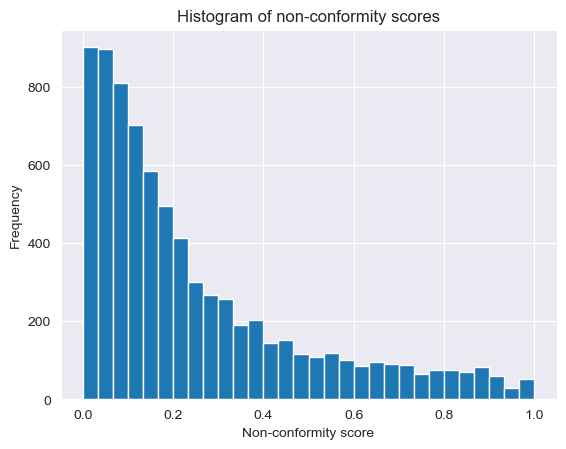

In [210]:
#plt.hist(scores.clone().detach().numpy(), bins=30, range=(0, 1))
plt.hist(scores.detach().clone().numpy(), bins=30, range=(0, 1))
plt.xlabel("Non-conformity score")
plt.ylabel("Frequency")
plt.title("Histogram of non-conformity scores")
plt.show()

In [136]:
prediction_sets = []

# Iterating through the probabilities tensor
for prob in test_preds_lim:
    prediction_set = []
    if prob > 1-qhat:
        prediction_set.append("Charged Off")
    if 1 - prob > 1-qhat:
        prediction_set.append("Fully Paid")
    prediction_sets.append(prediction_set)

print(prediction_sets)

[['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Char

In [211]:
print(test_preds_lim)

tensor([[0.6307],
        [0.2211],
        [0.7814],
        ...,
        [0.3288],
        [0.3422],
        [0.5020]], grad_fn=<SigmoidBackward0>)


In [212]:
print(1-qhat)

0.2064516544342041


In [137]:
# Initialize counters for sets of length 1 and length 2
count_length_1 = 0
count_length_2 = 0

# Iterate through the prediction_sets list
for prediction_set in prediction_sets:
    if len(prediction_set) == 1:
        count_length_1 += 1
    elif len(prediction_set) == 2:
        count_length_2 += 1

print("Number of prediction sets of length 1:", count_length_1)
print("Number of prediction sets of length 2:", count_length_2)


Number of prediction sets of length 1: 4726
Number of prediction sets of length 2: 2898


In [146]:

# Assuming you have your XGBoost model and data ready
# xgb_model = your XGBoost model (already trained)
# X_calibration = your calibration dataset
# y_calibration = your true labels for the calibration dataset

# Get the probability predictions
predictions = xgb_model.predict_proba(X_calibration_scaled)
predictions_xgb_proba = xgb_model.predict_proba(X_test_scaled)
# Convert y_calibration to a numpy array if it's not already
y_calibration = np.array(y_calibration)

# Get the probability for the true class
true_class_probs = np.array([predictions[i, y_calibration[i]] for i in range(len(y_calibration))])

# Turn scores into uncertainty scores
scores = 1 - true_class_probs

alpha = 0.01

# define quantile
q_level = np.ceil((n+1)*(1-alpha))/n
#qhat = np.quantile(scores.clone().detach(), q_level, method='higher')
qhat = np.quantile(scores, q_level, method='higher')

prediction_sets=[]

# Iterating through the probabilities tensor
for prob in predictions_xgb_lim_proba[:,1]:
    prediction_set = []
    if prob > 1-qhat:
        prediction_set.append(1)
    if 1 - prob > 1-qhat:
        prediction_set.append(0)
    prediction_sets.append(prediction_set)

coverage = calculate_coverage(prediction_sets, y_test.tolist())
print(f"Coverage: {coverage:.2f}%")


Coverage: 93.90%


In [163]:
#Select model to test
probabilities = test_preds_mlpsl

# Define the high confidence threshold
threshold = 0.99

# Get high confidence predictions
high_confidence_mask = (probabilities >= threshold) | (probabilities <= 1 - threshold)

# Convert the predicted probabilities to binary predictions (0 or 1)
binary_predictions = (probabilities >= 0.5).float()

# Calculate the accuracy of high-confidence predictions
correct_high_confidence_predictions = (binary_predictions[high_confidence_mask] == y_test_tensor[high_confidence_mask]).float()
coverage = correct_high_confidence_predictions.mean().item()
total_high_confidence = high_confidence_mask.sum().item()

print(f"Coverage: {round(coverage, 4)}")
print(f"Number of high-confidence predictions: {total_high_confidence}")

Coverage: 0.7767
Number of high-confidence predictions: 215


In [97]:
def calculate_coverage(prediction_sets, y_test):
    correct_predictions = 0

    for i, prediction_set in enumerate(prediction_sets):
        if y_test[i] in prediction_set:
            correct_predictions += 1

    coverage_percentage = (correct_predictions / len(y_test)) * 100
    return coverage_percentage

In [159]:
n = len(X_calibration)
#get the probability predictions
predictions = mlpsl_model(X_calibration_tensor)
#get the probability for the true class
true_class_probs = torch.where(y_calibration_tensor == 1, predictions, 1 - predictions)
#Turn scores into uncertainty score
scores = 1-true_class_probs

#Setting the alpha value
alpha = 0.01

# define quantile
q_level = np.ceil((n+1)*(1-alpha))/n
#qhat = np.quantile(scores.clone().detach(), q_level, method='higher')
qhat = np.quantile(scores.detach().clone().numpy(), q_level, method='higher')

prediction_sets = []

# Iterating through the probabilities tensor
for prob in test_preds_mlpsl:
    prediction_set = []
    if prob > 1-qhat:
        prediction_set.append(1)
    if 1 - prob > 1-qhat:
        prediction_set.append(0)
    prediction_sets.append(prediction_set)

coverage = calculate_coverage(prediction_sets, y_test.tolist())
print(f"Coverage: {coverage:.2f}%")

Coverage: 99.09%


# Comparing models

In [149]:
rounded_preds_lr = torch.round(test_preds_mlp_lim)
rounded_preds_sl = torch.round(test_preds_mlpsl_lim)

different_predictions = (rounded_preds_lr != rounded_preds_sl)

correct_predictions_lr = (rounded_preds_lr == y_test_tensor)
correct_predictions_sl = (rounded_preds_sl == y_test_tensor)

different_and_correct_lr = different_predictions & correct_predictions_lr
different_and_correct_sl = different_predictions & correct_predictions_sl

#indices where predictions are different and correct
indices_different_and_correct_lr = torch.nonzero(different_and_correct_lr).flatten()
indices_different_and_correct_sl = torch.nonzero(different_and_correct_sl).flatten()

In [150]:
only_sl_correct = torch.nonzero(different_and_correct_sl.float(), as_tuple=True)[0].tolist()
only_lr_correct = torch.nonzero(different_and_correct_lr.float(), as_tuple=True)[0].tolist()

In [154]:
X_test.iloc[only_lr_correct]['last_fico_range_low']
print('Meet the rule: ',sum(X_test.iloc[only_lr_correct]['last_fico_range_low']<652.5))
print('True class: ',sum(y_test.iloc[only_lr_correct]))


Meet the rule:  88
True class:  13


In [158]:
rule_test = torch.tensor(X_test['last_fico_range_low'].values, dtype=torch.float32).reshape(len(y_test),1)<=652.5
rule_matched = torch.nonzero(rule_test.float(), as_tuple=True)[0].tolist()
yespred = torch.nonzero(test_preds_sl.round(), as_tuple=True)[0].tolist()
same = [value for value in yespred if value in rule_matched]
len(same)

1912

In [487]:
intersection_sl = [value for value in only_sl_correct if value in rule_matched]
intersection_lr = [value for value in only_lr_correct if value in rule_matched]

In [490]:
X_test.iloc[intersection_sl].shape

(11, 1001)

In [483]:
yespred = torch.nonzero(test_preds_sl.round(), as_tuple=True)[0].tolist()
correct_preds = torch.nonzero(y_test_tensor, as_tuple=True)[0].tolist()
intersect = [value for value in yespred if value in rule_matched]
good_preds_matched_rule = [value for value in intersect if value in correct_preds]

len(intersect)

1954

In [492]:
torch.sum(test_preds_sl.round())

tensor(2155., grad_fn=<SumBackward0>)

# Significance testing

In [463]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon

pred1 = test_preds_lr.round().detach().numpy()
pred2 = test_preds_sl.round().detach().numpy()

acc1 = accuracy_score(y_test, pred1)
prec1 = precision_score(y_test, pred1)
rec1 = recall_score(y_test, pred1)
f1_1 = f1_score(y_test, pred1)

acc2 = accuracy_score(y_test, pred2)
prec2 = precision_score(y_test, pred2)
rec2 = recall_score(y_test, pred2)
f1_2 = f1_score(y_test, pred2)

# Collect the metrics in arrays
metrics1 = [acc1, prec1, rec1, f1_1]
metrics2 = [acc2, prec2, rec2, f1_2]

print(wilcoxon(1,2))

for i, (m1, m2) in enumerate(zip(metrics1, metrics2)):
    stat, p_value = wilcoxon([m1], [m2])
    print(f"{metric_names[i]}: Statistic: {stat}, P-value: {p_value}")


# Assume metric_names contains the names of the metrics
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, (m1, m2) in enumerate(zip(metrics1, metrics2)):
    t_stat, p_value = ttest_rel([m1], [m2])
    print(f"{metric_names[i]}: T-statistic: {t_stat}, P-value: {p_value}")


WilcoxonResult(statistic=0.0, pvalue=1.0)
Accuracy: Statistic: 0.0, P-value: 1.0
Precision: Statistic: 0.0, P-value: 1.0
Recall: Statistic: 0.0, P-value: 1.0
F1-Score: Statistic: 0.0, P-value: 1.0
Accuracy: T-statistic: nan, P-value: nan
Precision: T-statistic: nan, P-value: nan
Recall: T-statistic: nan, P-value: nan
F1-Score: T-statistic: nan, P-value: nan


C:\Users\Andras\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Andras\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Andras\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
